<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Análise Exploratória de Dados de Logística I
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Introdução ao Kaggle;</li>
  <li>Introdução ao problema de negócios;</li>
  <li>Exploração de dados.</li>
</ol>


---

# **Exercícios**

Este *notebook* deve servir como um guia para a construção da sua própria análise exploratória de dados. Fique a vontate para copiar os códigos da aula mas busque explorar os dados ao máximo. Por fim, publique seu *notebook* no [Kaggle](https://www.kaggle.com/).

---

# **Análise Exploratória de Dados de Logística**

## 1\. Contexto

Escreva uma breve descrição do problema.

A LOGGI É UMA EMPRESA DE LOGISTICA QUE EM MEADOS DE 2017 ENTROU NO SEGMENTO DE E-COMMERCE, E ATUALMENTE TAMBÉM REALIZA A ENTREGA DE PRODUTOS ALIMENTÍCIOS.

A MESMA ATUA ATIVAMENTE EM DIVERSOS ESTADOS BRASILEIROS, BEM COMO EM SUAS REGIÕES, FOCANDO SEMPRE NA AGILIDADE E NA QUALIDADE DA ENTREGA DO PRODUTO ATÉ O CONSUMIDOR.

DIANTE DO CITADO ACIMA, ABAIXO IREMOS VISUALIZAR E TRABALHAR COM OS DADOS DISPONIBILIZADOS PELA LOGGI NA CIDADE DE BRASILIA. O OBJETIVO É ENTENDER MELHOR O(S) PROBLEMA(S) E ATRAVES DOS DADOS DESENVOLVER SOLUÇÕES EFICAZES PARA A OTIMIZAÇÃO DAS ROTAS DE ENTREGA, ALOCAÇÃO DE ENTREGAS NOS VEÍCULOS DA FROTA COM CAPACIDADE LIMITADA ETC.

## 2\. Pacotes e bibliotecas

In [1]:

import json
import pandas as pd
import seaborn as sns


## 3\. Exploração de dados

In [2]:
!wget -q "https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/deliveries.json" -O deliveries.json

In [3]:
import json

with open('deliveries.json', mode='r', encoding='utf8') as file:
  data = json.load(file)

In [4]:
len(data)

199

In [5]:
example = data[0]

In [6]:
example['name']

'cvrp-2-df-33'

In [7]:
example['region']

'df-2'

In [8]:
example['origin']['lat']

-15.83814451122274

In [9]:
example['origin']['lng']

-48.05498915846707

In [10]:
example['vehicle_capacity']

180

In [11]:
example['deliveries'][0]['point']['lat']

-15.848929154862294

In [12]:
deliveries_df = pd.DataFrame(data)
deliveries_df.head()

,name,region,origin,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


NO DATAFRAME ACIMA NOTA-SE QUE TODOS OS VEÍCULOS POSSUEM CAPACIDADE DE 180 PACOTES. NA COLUNA "ORIGIN" A LONGITUDE (lng) E A LATITUDE (lat) ESTÃO JUNTAS. PARA MELHOR VISUALIZARMOS A LOCALIZAÇÃO DAS ENTREGAS E A ORIGEM, IREMOS SEPARAR ESSES DADOS EM COLUNAS DISTINTAS:

In [13]:
hub_origin_df = pd.json_normalize(deliveries_df["origin"])
hub_origin_df.head()

,lng,lat
0,-48.054989,-15.838145
1,-48.054989,-15.838145
2,-48.054989,-15.838145
3,-47.893662,-15.805118
4,-48.054989,-15.838145


CONSEGUMOS OBTER UM DADO MAIS "LIMPO" DA LONGITUDE E DA LATITUDE DA COLUNA "ORIGIN", AGORA BASTA INCLUIRMOS NO DATAFRAME O DADO OBTIDO:

In [14]:
deliveries_df = pd.merge(left=deliveries_df, right=hub_origin_df, how='inner', left_index=True, right_index=True)
deliveries_df.head()

,name,region,origin,vehicle_capacity,deliveries,lng,lat
0,cvrp-2-df-33,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p...",-48.054989,-15.838145
1,cvrp-2-df-73,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po...",-48.054989,-15.838145
2,cvrp-2-df-20,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p...",-48.054989,-15.838145
3,cvrp-1-df-71,df-1,"{'lng': -47.89366206897872, 'lat': -15.8051175...",180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p...",-47.893662,-15.805118
4,cvrp-2-df-87,df-2,"{'lng': -48.05498915846707, 'lat': -15.8381445...",180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p...",-48.054989,-15.838145


AS DUAS COLUNAS RECÉM CRIADAS FORAM PARA O FINAL DO DATAFRAME, DESTA FORMA FICOU MUITO CONFUSO E NADA VISUAL. DIANTE DISTO IREMOS APAGAR A COLUNA "ORIGIN" E SUBSTITUIR PELAS COLUNAS "lng" E "lat".

In [15]:
deliveries_df = deliveries_df.drop("origin", axis=1)
deliveries_df = deliveries_df[["name", "region", "lng", "lat", "vehicle_capacity", "deliveries"]]
deliveries_df.head()

,name,region,lng,lat,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


O DATAFRAME JÁ ESTÁ BEM MAIS VISUAL. PARA COMPLEMENTAR IREMOS ALTERAR O NOME DAS COLUNAS "lng" E "lat":

In [16]:
deliveries_df.rename(columns={"lng": "hub_lng", "lat": "hub_lat"}, inplace=True)
deliveries_df.head()

,name,region,hub_lng,hub_lat,vehicle_capacity,deliveries
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,"[{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'p..."
1,cvrp-2-df-73,df-2,-48.054989,-15.838145,180,"[{'id': 'bf3fc630b1c29601a4caf1bdd474b85', 'po..."
2,cvrp-2-df-20,df-2,-48.054989,-15.838145,180,"[{'id': 'b30f1145a2ba4e0b9ac0162b68d045c3', 'p..."
3,cvrp-1-df-71,df-1,-47.893662,-15.805118,180,"[{'id': 'be3ed547394196c12c7c27c89ac74ed6', 'p..."
4,cvrp-2-df-87,df-2,-48.054989,-15.838145,180,"[{'id': 'a6328fb4dc0654eb28a996a270b0f6e4', 'p..."


IREMOS REPETIR O MESMO PROCESSO PARA A COLUNA "DELIVERIES". A DIFERENÇA É QUE DESTA VEZ ESTAMOS UTILIZANDO O "EXPLODE", QUE TRANSFORMA OS ELEMENTOS DA LISTA EM UMA LINHA. UTILIZAZEMOS O "FLATTEN", RESPONSÁVEL PELO ACHATAMENTO DO RESULTADO. DESTA FORMA, PODEMOS VISUALIZAR MELHOR O "ID" DE CADA ENTREGA.

In [17]:
deliveries_exploded_df = deliveries_df[["deliveries"]].explode("deliveries")
deliveries_exploded_df.head()

,deliveries
0,"{'id': '313483a19d2f8d65cd5024c8d215cfbd', 'po..."
0,"{'id': '320c94b17aa685c939b3f3244c3099de', 'po..."
0,"{'id': '3663b42f4b8decb33059febaba46d5c8', 'po..."
0,"{'id': 'e11ab58363c38d6abc90d5fba87b7d7', 'poi..."
0,"{'id': '54cb45b7bbbd4e34e7150900f92d7f4b', 'po..."


In [18]:
deliveries_normalized_df = pd.concat([
  pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["size"])).rename(columns={"deliveries": "delivery_size"}),
  pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["point"]["lng"])).rename(columns={"deliveries": "delivery_lng"}),
  pd.DataFrame(deliveries_exploded_df["deliveries"].apply(lambda record: record["point"]["lat"])).rename(columns={"deliveries": "delivery_lat"}),
], axis= 1)
deliveries_normalized_df.head()

,delivery_size,delivery_lng,delivery_lat
0,9,-48.116189,-15.848929
0,2,-48.118195,-15.850772
0,1,-48.112483,-15.847871
0,2,-48.118023,-15.846471
0,7,-48.114898,-15.858055


UTILIZANDO OS MÉTODOS CITADOS ACIMA, PODEMOS OBSERVAR DE UMA MANEIRA MAIS VISUAL A QUANTIDADE DE ENTREGAS, A LONGITUDE E A LATITUDE, RESPECTIVAMENTE.

ABAIXO IREMOS COMBINAR OS "NOVOS" DADOS OBTIDOS NO DATAFRAME DE ORIGEM ATRAVÉS DO MÉTODO "MERGE", E COMO UMA BOA PRATICA, IREMOS VERIFICAR SE NÃO OUVE PERDA DE DADOS DURANTE O PROCESSO.

In [19]:
len(deliveries_exploded_df)

636149

In [20]:
len(deliveries_df)

199

In [21]:
deliveries_df = deliveries_df.drop("deliveries", axis=1)
deliveries_df = pd.merge(left=deliveries_df, right=deliveries_normalized_df, how='right', left_index=True, right_index=True)
deliveries_df.reset_index(inplace=True, drop=True)
deliveries_df.head()

,name,region,hub_lng,hub_lat,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.114898,-15.858055


In [22]:
len(deliveries_df)

636149

PELOS DADOS OBTIDOS NO DATAFRAME ACIMA, PODEMOS CONCLUIR QUE OS VEICULOS UTILIZADOS PARA ENTREGA ESTÃO MUITO ABAIXO DA SUA CAPACIDADE.
COM UMA QUANTIDADE MAIOR QUE A NECESSÁRIA DE VEÍCULOS EM CIRCULAÇÃO, PODEMOS ENFRENTAR ATRASOS NAS ENTREGAS DEVIDO AO TRÂNSITO.
E A QUANTIDADE DE ENCOMENDAS ENTREGUES NO DIA PODE NÃO SUPRIR COM OS CUSTOS DA ENTREGA (COMBUSTIVEL, MÃO DE OBRA, MANUTENÇÃO E IMPREVISTOS (PNEU FURADO E FURTO POR EXEMPLO).


In [23]:
deliveries_df.shape

(636149, 8)

In [24]:
deliveries_df.columns

Index(['name', 'region', 'hub_lng', 'hub_lat', 'vehicle_capacity',
       'delivery_size', 'delivery_lng', 'delivery_lat'],
      dtype='object')

In [25]:
deliveries_df.index

RangeIndex(start=0, stop=636149, step=1)

In [26]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636149 entries, 0 to 636148
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              636149 non-null  object 
 1   region            636149 non-null  object 
 2   hub_lng           636149 non-null  float64
 3   hub_lat           636149 non-null  float64
 4   vehicle_capacity  636149 non-null  int64  
 5   delivery_size     636149 non-null  int64  
 6   delivery_lng      636149 non-null  float64
 7   delivery_lat      636149 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 38.8+ MB


Schema

In [27]:
deliveries_df.head(n=5)

,name,region,hub_lng,hub_lat,vehicle_capacity,delivery_size,delivery_lng,delivery_lat
0,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,9,-48.116189,-15.848929
1,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118195,-15.850772
2,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,1,-48.112483,-15.847871
3,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,2,-48.118023,-15.846471
4,cvrp-2-df-33,df-2,-48.054989,-15.838145,180,7,-48.114898,-15.858055


In [28]:
deliveries_df.dtypes

name                 object
region               object
hub_lng             float64
hub_lat             float64
vehicle_capacity      int64
delivery_size         int64
delivery_lng        float64
delivery_lat        float64
dtype: object

In [29]:
deliveries_df.select_dtypes("object").describe().transpose()

,count,unique,top,freq
name,636149,199,cvrp-1-df-87,5636
region,636149,3,df-1,304708


In [30]:
deliveries_df.drop(["name", "region"], axis=1).select_dtypes('int64').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
vehicle_capacity,636149.0,180.000000,0.000000,180.0,180.0,180.0,180.0,180.0
delivery_size,636149.0,5.512111,2.874557,1.0,3.0,6.0,8.0,10.0


In [31]:
!pip3 install geopandas;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 77.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 99.0 MB/s eta 0:00:00


In [32]:
import geopandas

In [33]:
import matplotlib.pyplot as plt

replace ./maps/ASB_Cemiterio_A.dbf? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

<ipython-input-35-bfbe58669d08>:27: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in lgnd.legendHandles:


AttributeError: ignored

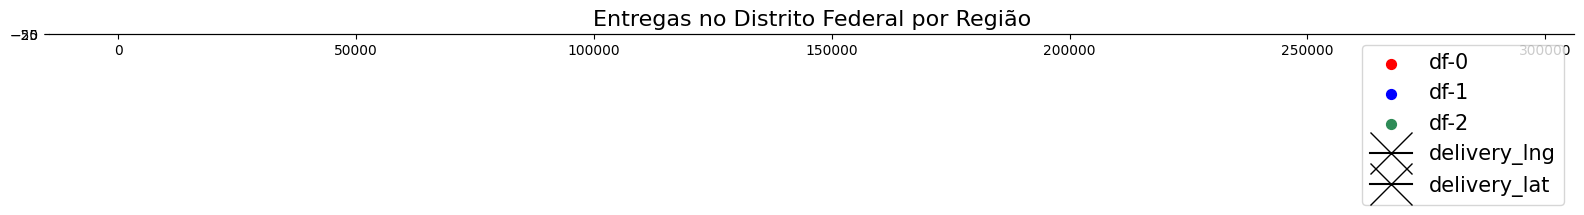

In [35]:
!wget -q "https://geoftp.ibge.gov.br/cartas_e_mapas/bases_cartograficas_continuas/bc100/go_df/versao2016/shapefile/bc100_go_df_shp.zip" -O distrito-federal.zip
!unzip -q distrito-federal.zip -d ./maps
!cp ./maps/LIM_Unidade_Federacao_A.shp ./distrito-federal.shp
!cp ./maps/LIM_Unidade_Federacao_A.shx ./distrito-federal.shx

mapa = geopandas.read_file("distrito-federal.shp")

geo_base = deliveries_df[["region", "delivery_lng", "delivery_lat"]].drop_duplicates().reset_index(drop= True)
geo_base_df = geopandas.GeoDataFrame( geo_base, geometry=geopandas.points_from_xy( geo_base["delivery_lng"], geo_base["delivery_lat"] ) )
geo_base_df.head()

geo_entregas_df = geopandas.GeoDataFrame( deliveries_df, geometry=geopandas.points_from_xy( deliveries_df["delivery_lng"], deliveries_df["delivery_lat"] ) )
geo_entregas_df.head()

fig, ax = plt.subplots(figsize = (50/2.54, 50/2.54))

mapa.plot(ax=ax, alpha= 0.4, color= "lightgrey")

geo_entregas_df.query("region == 'df-0'").plot( ax=ax, markersize=1, color="red", label="df-0" )
geo_entregas_df.query("region == 'df-1'").plot( ax=ax, markersize=1, color="blue", label="df-1" )
geo_entregas_df.query("region == 'df-2'").plot( ax=ax, markersize=1, color="seagreen", label="df-2")

geo_base.plot( ax=ax, markersize=30, marker="x", color="black", label="hub" )

plt.title( "Entregas no Distrito Federal por Região", fontdict={"fontsize": 16} )
lgnd = plt.legend(prop={"size": 15})
for handle in lgnd.legendHandles:
 handle.set_sizes([50])